# Macro Image Boxes
Investigating WSI metadata related to the coordinates in the macro images that represent the scanned WSI region.

In [15]:
# Imports
from girder_client import GirderClient
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from pprint import pprint

In [6]:
gc = GirderClient(apiUrl='https://megabrain.neurology.emory.edu/api/v1')
_ = gc.authenticate(interactive=True)

In [7]:
# Use a WSI with a valid macro image and internal metadata for testing.
item_id = 'item/641c2213867536bb7a23bea5/tiles/internal_metadata'

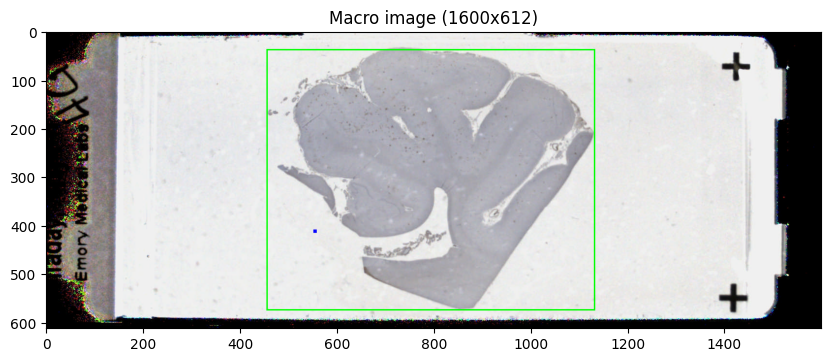

In [17]:
# Get the macro image.
response = gc.get(f"item/{item_id}/tiles/images/macro?encoding=PNG", jsonResp=False)

# Convert the response to a numpy image.
img = np.array(Image.open(BytesIO(response.content)))

# Show this image.
h, w = img.shape[:2]

plt.figure(figsize=(10, 10))
plt.imshow(img)
# plt.axis('off')
plt.title(f"Macro image ({w}x{h})")
plt.show()

In [16]:
# Get the large image internal metadata.
metadata = gc.get(f"item/{item_id}/tiles/internal_metadata")
pprint(metadata)

{'aperio_version': 'Aperio Image Library v12.0.16',
 'iccprofiles': ['AT2'],
 'openslide': {'aperio.AppMag': '40',
               'aperio.Date': '02/23/22',
               'aperio.DisplayColor': '0',
               'aperio.Exposure Scale': '0.000001',
               'aperio.Exposure Time': '45',
               'aperio.Filename': 'E22-02_ABETA_1',
               'aperio.Focus Offset': '0.000000',
               'aperio.ICC Profile': 'AT2',
               'aperio.ImageID': '1049208',
               'aperio.Left': '18.282028',
               'aperio.LineAreaXOffset': '-0.014056',
               'aperio.LineAreaYOffset': '0.007910',
               'aperio.LineCameraSkew': '0.000365',
               'aperio.MPP': '0.2519',
               'aperio.OriginalHeight': '85921',
               'aperio.OriginalWidth': '111760',
               'aperio.ScanScope ID': 'APERIONP',
               'aperio.SessonMode': 'NR',
               'aperio.StripeWidth': '2032',
               'aperio.Time': '15:28:

## Conclusions
The large image internal metadata does not contain any information that is related to the green box in the macro image. 